In [1]:
# import packges 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Data
general_data = pd.read_csv('https://raw.githubusercontent.com/Yasmeenmad/data_science_bootcamp/main/Week10/Intro_Machine_Learning4/general_data.csv')
manager_survey_data = pd.read_csv('https://raw.githubusercontent.com/Yasmeenmad/data_science_bootcamp/main/Week10/Intro_Machine_Learning4/manager_survey_data.csv')
employee_survey_data = pd.read_csv('https://raw.githubusercontent.com/Yasmeenmad/data_science_bootcamp/main/Week10/Intro_Machine_Learning4/employee_survey_data.csv')

df_join = pd.merge(left=general_data, right=manager_survey_data, left_on='EmployeeID', right_on='EmployeeID')
df = pd.merge(left=df_join, right=employee_survey_data, left_on='EmployeeID', right_on='EmployeeID')

In [3]:
# show the dataset
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,6,1,0,0,3,3,3.0,4.0,2.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,6.0,3,5,1,4,2,4,3.0,2.0,4.0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,5.0,2,5,0,3,3,3,2.0,2.0,1.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,13.0,5,8,7,5,2,3,4.0,4.0,3.0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,9.0,2,6,0,4,3,3,4.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,10.0,5,3,0,2,3,3,4.0,1.0,3.0
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,10.0,2,3,0,2,2,3,4.0,4.0,3.0
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,5.0,4,4,1,2,3,4,1.0,3.0,3.0
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,10.0,2,9,7,8,2,3,4.0,1.0,3.0


In [4]:
# general information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

## Data Exploration

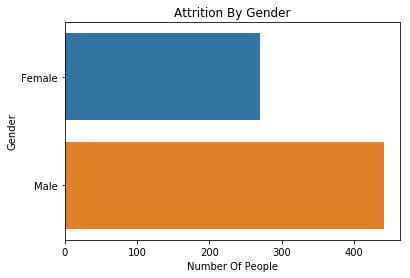

In [5]:
# plot 1
# plot bar plot for Attrition By Gender
sns.barplot(x=df[df["Attrition"] == 'Yes'].groupby("Gender")["Attrition"].count().values,
            y=df[df["Attrition"] == 'Yes'].groupby("Gender")["Attrition"].count().index,
            data=df)
# plot title & x axis label                                                                 
plt.title('Attrition By Gender')
plt.xlabel('Number Of People');

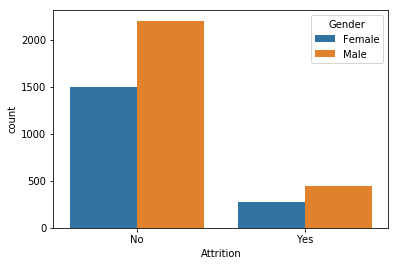

In [6]:
# plot 2
# plot Attrition by Gender
sns.countplot(x = "Attrition",data=df,hue="Gender");

In [7]:
# drop the unwanted values in 'Age' column to help us plot the next plot
df1 = df
df1.drop(df.index[df1['Age'] == 54], inplace = True)
df1.drop(df.index[df1['Age'] == 57], inplace = True)
df1.drop(df.index[df1['Age'] == 59], inplace = True)
df1.drop(df.index[df1['Age'] == 60], inplace = True)

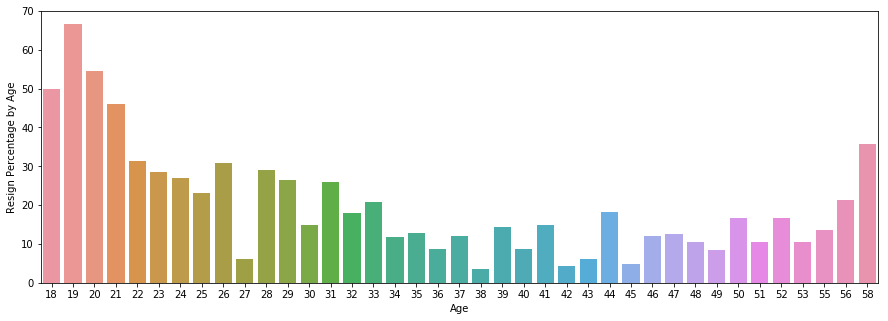

In [8]:
# plot 3
# the size of our plot
plt.figure(figsize=(15,5))

# plot Resign Percentage by Age
sns.barplot(x=(df[df["Attrition"] == 'Yes'])["Age"].value_counts().sort_index().index,
            y=((df[df["Attrition"] == 'Yes'])["Age"].value_counts().sort_index().values/(df1["Age"].value_counts().sort_index().values))*100,
            data=df[df["Attrition"] == 'Yes'])
# y & x axis labels                                                  
plt.xlabel('Age')
plt.ylabel('Resign Percentage by Age');

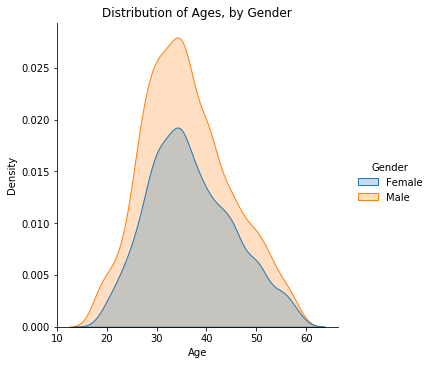

In [9]:
# plot 4
# plot Distribution of Ages, by Gender
sns.displot(df, x="Age", hue="Gender", kind="kde", fill=True)

# plot title
plt.title("Distribution of Ages, by Gender");

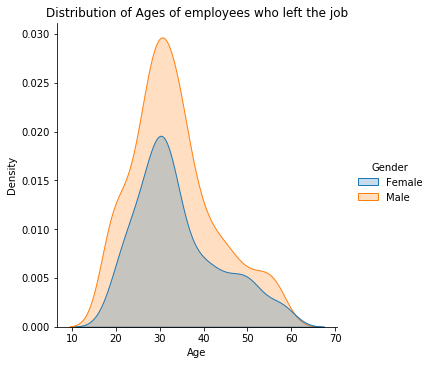

In [10]:
# plot 5
# plot Distribution of Ages of employees who left the job
sns.displot(df[df["Attrition"] == 'Yes'], x="Age", hue="Gender", kind="kde", fill=True)

# plot title
plt.title("Distribution of Ages of employees who left the job");

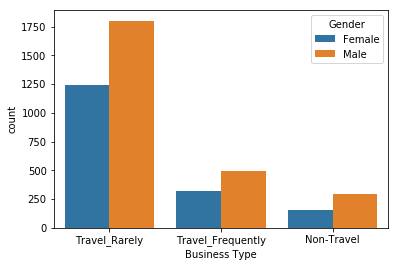

In [11]:
# plot 6
# plot BusinessTravel by Gender
sns.countplot(x = "BusinessTravel",data=df,hue="Gender")

# x axis label
plt.xlabel('Business Type');

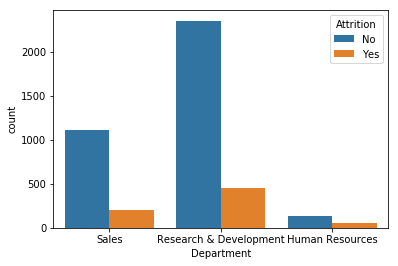

In [12]:
# plot 7
# plot Department by Attrition
sns.countplot(x = "Department",data=df,hue="Attrition")

# x axis label
plt.xlabel('Department');

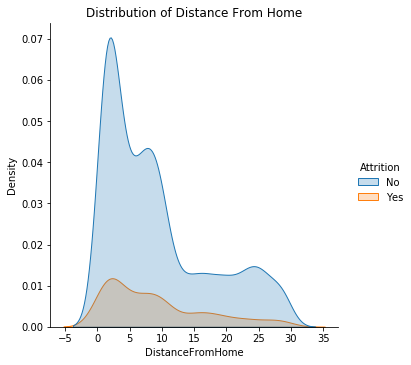

In [13]:
# plot 8
# plot Distribution of Distance From Home
sns.displot(df, x="DistanceFromHome", hue="Attrition", kind="kde", fill=True)

# plot title
plt.title("Distribution of Distance From Home");

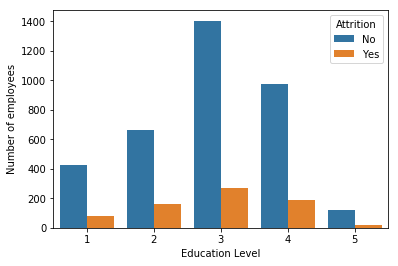

In [14]:
# plot 9
# plot Education by Attrition
sns.countplot(x = "Education",data=df,hue="Attrition")

# x&y labels
plt.xlabel('Education Level')
plt.ylabel('Number of employees');

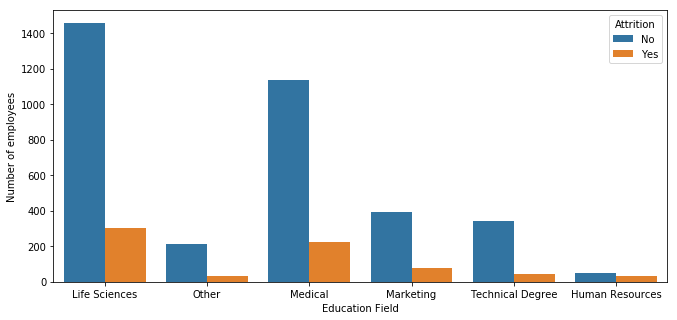

In [15]:
# plot 10
# the size of our plot
plt.figure(figsize=(11,5))

# plot EducationField by Attrition
sns.countplot(x = "EducationField",data=df,hue="Attrition")

# x & y labels
plt.xlabel('Education Field')
plt.ylabel('Number of employees');

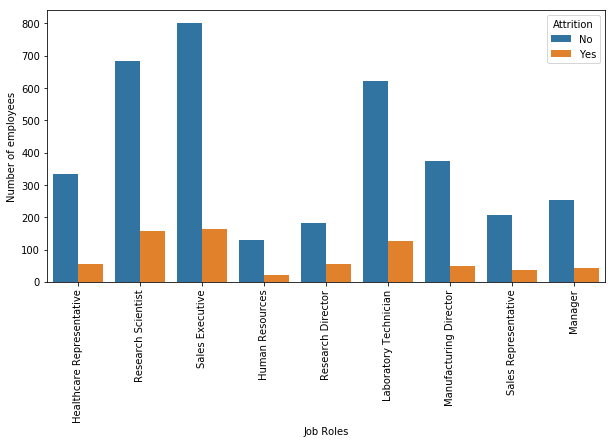

In [16]:
# plot 11
# the size of our plot
plt.figure(figsize=(10,5))

# plot JobRole by Attrition
sns.countplot(x = "JobRole", data=df,hue="Attrition")

# x & y labels
plt.xlabel('Job Roles')
plt.ylabel('Number of employees')

# rotate the x axis label names
locs, labels = plt.xticks()
plt.setp(labels, rotation=90);

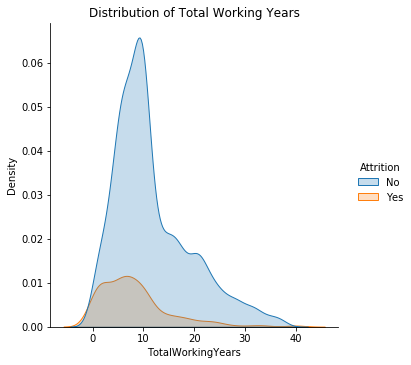

In [17]:
# plot 12
# plot Distribution of Total Working Years
sns.displot(df, x="TotalWorkingYears", hue="Attrition", kind="kde", fill=True)

# plot title
plt.title("Distribution of Total Working Years");

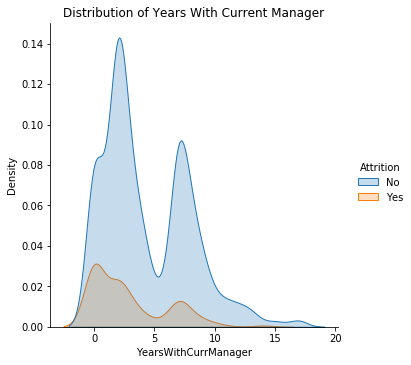

In [18]:
# plot 13
# plot Distribution of Years With Current Manager
sns.displot(df, x="YearsWithCurrManager", hue="Attrition", kind="kde", fill=True)

# plot title
plt.title("Distribution of Years With Current Manager");

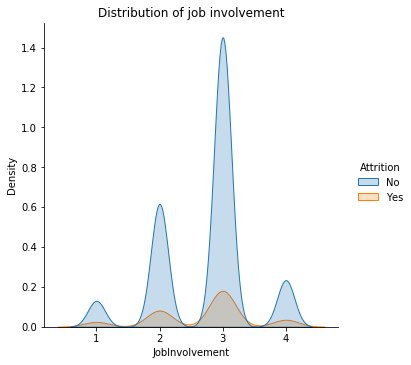

In [19]:
# plot 14
# plot Distribution of job involvement
sns.displot(df, x="JobInvolvement", hue="Attrition", kind="kde", fill=True)

# plot title
plt.title("Distribution of job involvement");

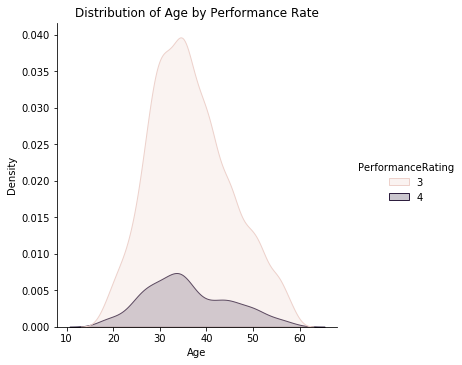

In [20]:
# plot 15
# plot Distribution of Age by Performance Rate
sns.displot(df, x="Age", hue="PerformanceRating", kind="kde", fill=True)

# plot title
plt.title("Distribution of Age by Performance Rate");

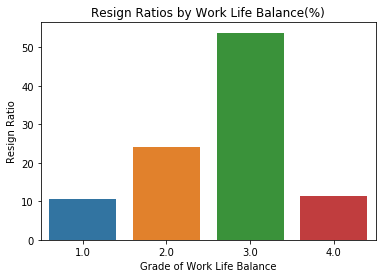

In [21]:
# plot 16
# plot Resign Ratios by Work Life Balance(%)
sns.barplot(x=df[df["Attrition"] == 'Yes'].groupby("WorkLifeBalance")["Attrition"].count().index,
            y=((df[df["Attrition"] == 'Yes'].groupby("WorkLifeBalance")["Attrition"].count())/sum(df[df["Attrition"] == 'Yes'].groupby("WorkLifeBalance")["Attrition"].count().values)*100).values,
            data=df[df["Attrition"] == 'Yes'])
                                              
# plot title    
plt.title('Resign Ratios by Work Life Balance(%)')

# x & y labels
plt.xlabel('Grade of Work Life Balance')
plt.ylabel('Resign Ratio');


## Logistic Regression

In [22]:
# first we will drop all the NaN values
df = df.dropna()

# replace all the object columns to numerical columns
df['Attrition'] = pd.factorize( df['Attrition'].values )[0]
df['Department'] = pd.factorize( df['Department'].values )[0]
df['BusinessTravel'] = pd.factorize( df['BusinessTravel'].values )[0]
df['EducationField'] = pd.factorize( df['EducationField'].values )[0]
df['Gender'] = pd.factorize( df['Gender'].values )[0]
df['JobRole'] = pd.factorize( df['JobRole'].values )[0]
df['MaritalStatus'] = pd.factorize( df['MaritalStatus'].values )[0]
df['Over18'] = pd.factorize( df['Over18'].values )[0]
df['BusinessTravel'] = pd.factorize( df['BusinessTravel'].values )[0]

In [23]:
# setting the x, y for the Logistic Regression model
X = df.drop('Attrition', axis = 1) #feature matrix
y = df.Attrition # target vector

# standard scaled X matrix
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

X_train, X_test, y_train, y_test =  train_test_split(X_std, y, test_size=0.20, random_state=111, stratify = y)

# creating logistic regression object
from sklearn.linear_model import LogisticRegression

# Logistic Regression

logreg = LogisticRegression()

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# creating grid search with 5 fold
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(logreg, hyperparameters, cv=5, verbose=0)

# fit grid search on data
model = clf.fit(X,y)

# view best parameters 
print('Best Penalty:', model.best_estimator_.get_params()['penalty'])
print('Best C:', model.best_estimator_.get_params()['C'])

# calculate test score
from sklearn import metrics

model = model.best_estimator_.fit(X_train, y_train)

# predictions for test set
y_preds = model.predict(X_test)

# the accuracy_score, recall_score for the Logistic Regression model
test_accuracy_log = metrics.accuracy_score(y_test, y_preds)
test_recall_log = metrics.recall_score(y_test, y_preds)
print('Test Accuracy:', test_accuracy_log)
print('Test Sensitivity:', test_recall_log)

Best Penalty: l2
Best C: 7.742636826811269
Test Accuracy: 0.8317422434367542
Test Sensitivity: 0.007194244604316547


### Based on your understanding of sensitivity and specificity which algorithm would you pick based on the report in the blog?

The algorithm that achieved the best scores in sensitivity and specificity was XGBoost, So I will pick this algorithm.